In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import timeit

# We will use sklearn for linear regression
import sklearn
from sklearn.linear_model import LinearRegression

# This is our beautiful implimentation :D 
import linear_regression as our_model
%matplotlib inline

In [2]:
data = pd.read_csv('../data/advertising.csv')
tv = np.array(data['TV']).reshape(-1, 1)
radio = np.array(data['Radio']).reshape(-1, 1)
newspaper = np.array(data['Newspaper']).reshape(-1, 1)
sales = data['Sales']

y = data['Sales']
X = np.hstack((np.ones((len(y), 1)), data[['TV', 'Radio', 'Newspaper']].values))

In [3]:
LR_sk = sklearn.linear_model.LinearRegression()
LR_ours = our_model.LinearRegression()

In [4]:
start_time = timeit.default_timer()
LR_ours.fit(X, y)
our_time = timeit.default_timer() - start_time

start_time = timeit.default_timer()
LR_sk.fit(X, y)
sk_time = timeit.default_timer() - start_time


print("Our time: %.3f" % our_time)
print("scikit-learn's time: %.3f" % sk_time)

Our time: 4.546
scikit-learn's time: 0.018


Our code appears to be much slower. There is no shame in this because scikit-learn is highly optimized, and the intensive components are likely running in compiled fortran or C. 

I also believe that sklearn's implimentation uses the analytic solution, which is likely cheaper but more memory intensive, so this may not be an apples to apples comparison

In [5]:
our_R2 = LR_ours.r_squared(X, y)
sk_R2 = LR_sk.score(X, y)

print("Our R^2: %.5f" % our_R2)
print("scikit-learn's R^2: %.5f" % sk_R2)

Our R^2: 0.89705
scikit-learn's R^2: 0.89721


It appears that our R2 is very similar. Since sklearn uses the analytic solution, this is also to be expected. 

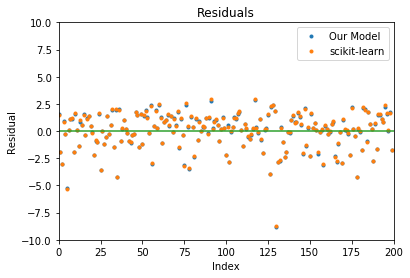

In [6]:
plt.plot(y-LR_sk.predict(X), '.')
plt.plot(y-LR_ours.predict(X), '.')
plt.plot((0,len(y)), (0, 0))
plt.xlabel('Index')
plt.ylabel('Residual')
plt.xlim((0, len(y)))
plt.ylim((-10, 10))
plt.legend(('Our Model', 'scikit-learn'))
plt.title('Residuals')
plt.show()

Clearly, our solutions are very similar! 